# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
#         print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind, 
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | charters towers
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | alotau
City not found. Skipping...
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | san andros
City not found. Skipping...
Processing Record 6 of Set 1 | kapuskasing
Processing Record 7 of Set 1 | ornskoldsvik
Processing Record 8 of Set 1 | mount pearl
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | witzenhausen
Processing Record 11 of Set 1 | maevatanana
City not found. Skipping...
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | fort bragg
Processing Record 14 of Set 1 | hami
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | crieff
Processing Record 17 of Set 1 | haiku-pauwela
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | northwest 

Processing Record 36 of Set 4 | thames
Processing Record 37 of Set 4 | kingscliff
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | itoman
Processing Record 40 of Set 4 | thief river falls
Processing Record 41 of Set 4 | hilo
Processing Record 42 of Set 4 | velez
Processing Record 43 of Set 4 | namibe
Processing Record 44 of Set 4 | cape canaveral
Processing Record 45 of Set 4 | salalah
Processing Record 46 of Set 4 | port mathurin
Processing Record 47 of Set 4 | remire-montjoly
Processing Record 48 of Set 4 | zhosaly
Processing Record 49 of Set 4 | buta
Processing Record 0 of Set 5 | grants pass
Processing Record 1 of Set 5 | hawaiian paradise park
Processing Record 2 of Set 5 | flying fish cove
Processing Record 3 of Set 5 | basco
Processing Record 4 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 5 of Set 5 | la tuque
Processing Record 6 of Set 5 | bu'aale
Processing Record 7 of Set 5 | hadibu
Processing Record 8 of Set 5 | arkhangel'sk
Pr

Processing Record 27 of Set 8 | tosontsengel
Processing Record 28 of Set 8 | tolanaro
Processing Record 29 of Set 8 | mejit
Processing Record 30 of Set 8 | kayangel
Processing Record 31 of Set 8 | kangding
Processing Record 32 of Set 8 | taltal
Processing Record 33 of Set 8 | porto novo
Processing Record 34 of Set 8 | ha giang
Processing Record 35 of Set 8 | taro
Processing Record 36 of Set 8 | mount isa
Processing Record 37 of Set 8 | thinadhoo
Processing Record 38 of Set 8 | maryville
Processing Record 39 of Set 8 | bilozerka
Processing Record 40 of Set 8 | kenai
Processing Record 41 of Set 8 | ares
Processing Record 42 of Set 8 | rosa zarate
Processing Record 43 of Set 8 | le moule
Processing Record 44 of Set 8 | suances
Processing Record 45 of Set 8 | borkum
Processing Record 46 of Set 8 | andirin
Processing Record 47 of Set 8 | bodaybo
Processing Record 48 of Set 8 | uvalde
Processing Record 49 of Set 8 | saldanha
Processing Record 0 of Set 9 | dakhla
Processing Record 1 of Set 9 

Processing Record 20 of Set 12 | aweil
Processing Record 21 of Set 12 | yekaterinoslavka
Processing Record 22 of Set 12 | gubkinskiy
Processing Record 23 of Set 12 | olyokminsk
Processing Record 24 of Set 12 | bronderslev
Processing Record 25 of Set 12 | nowshahr
Processing Record 26 of Set 12 | genhe
Processing Record 27 of Set 12 | brisas de zicatela
Processing Record 28 of Set 12 | saratamata
City not found. Skipping...
Processing Record 29 of Set 12 | argo
Processing Record 30 of Set 12 | barah
Processing Record 31 of Set 12 | nizhneangarsk
Processing Record 32 of Set 12 | san jeronimo amanalco
City not found. Skipping...
Processing Record 33 of Set 12 | phan rang-thap cham
Processing Record 34 of Set 12 | jijiga
Processing Record 35 of Set 12 | kenora
Processing Record 36 of Set 12 | shrigonda
Processing Record 37 of Set 12 | kargil
Processing Record 38 of Set 12 | usinsk
Processing Record 39 of Set 12 | nizhnesortymskiy
Processing Record 40 of Set 12 | dzhalagash
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,charters towers,-20.1000,146.2667,14.73,92,7,2.85,AU,1686431014
1,constantia,44.1833,28.6500,18.38,87,95,2.94,RO,1686430898
2,udachny,66.4167,112.4000,11.36,100,94,0.78,RU,1686431014
3,kapuskasing,49.4169,-82.4331,10.05,71,100,6.69,CA,1686431015
4,ornskoldsvik,63.2909,18.7153,9.53,81,65,1.03,SE,1686431015


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,charters towers,-20.1000,146.2667,14.73,92,7,2.85,AU,1686431014
1,constantia,44.1833,28.6500,18.38,87,95,2.94,RO,1686430898
2,udachny,66.4167,112.4000,11.36,100,94,0.78,RU,1686431014
3,kapuskasing,49.4169,-82.4331,10.05,71,100,6.69,CA,1686431015
4,ornskoldsvik,63.2909,18.7153,9.53,81,65,1.03,SE,1686431015


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

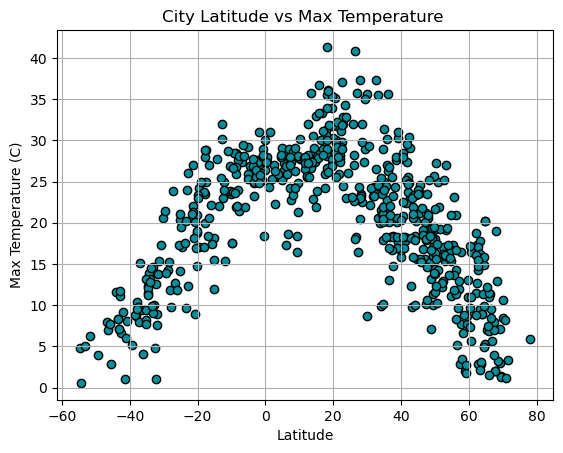

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color = "#008E9B", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature ")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

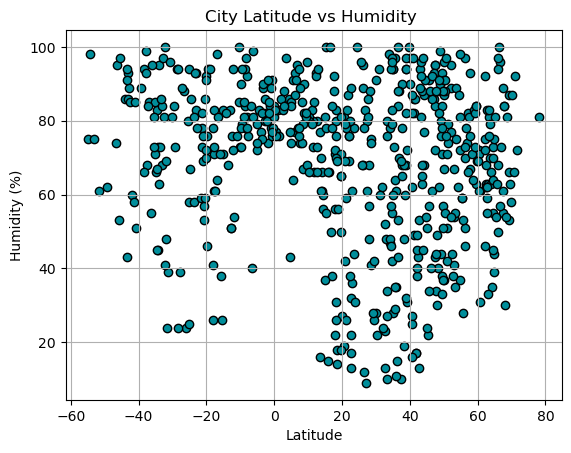

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color = "#008E9B", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

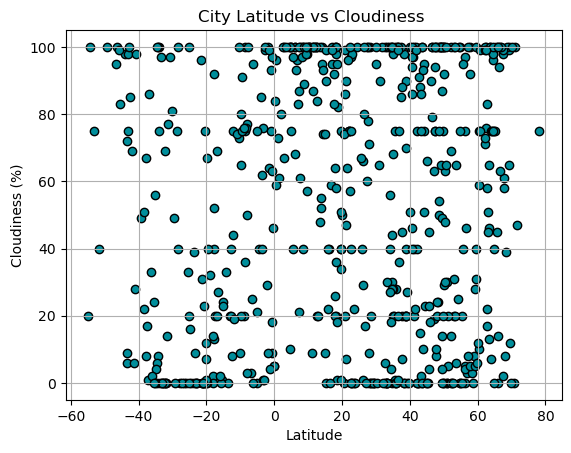

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color = "#008E9B", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

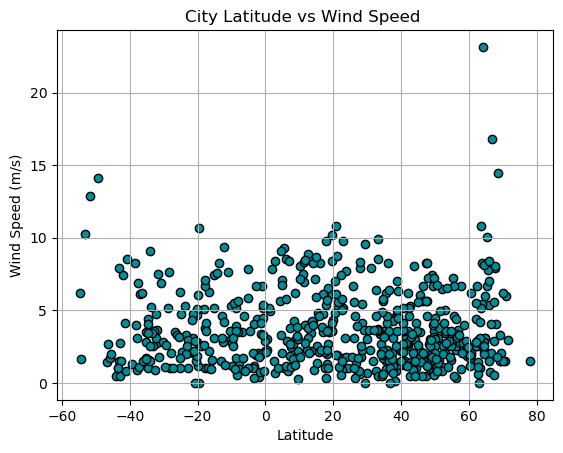

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",color = "#008E9B", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed ")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,constantia,44.1833,28.6500,18.38,87,95,2.94,RO,1686430898
2,udachny,66.4167,112.4000,11.36,100,94,0.78,RU,1686431014
3,kapuskasing,49.4169,-82.4331,10.05,71,100,6.69,CA,1686431015
4,ornskoldsvik,63.2909,18.7153,9.53,81,65,1.03,SE,1686431015
5,mount pearl,47.5166,-52.7813,10.19,95,75,8.23,CA,1686431015


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,charters towers,-20.1000,146.2667,14.73,92,7,2.85,AU,1686431014
6,luderitz,-26.6481,15.1594,12.70,88,0,3.51,NaN,1686431015
8,waitangi,-43.9535,-176.5597,11.57,86,98,0.45,NZ,1686431015
11,edinburgh of the seven seas,-37.0676,-12.3116,15.06,85,86,6.10,SH,1686431016
14,adamstown,-25.0660,-130.1015,20.33,58,100,6.23,PN,1686431016


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7645386550128339


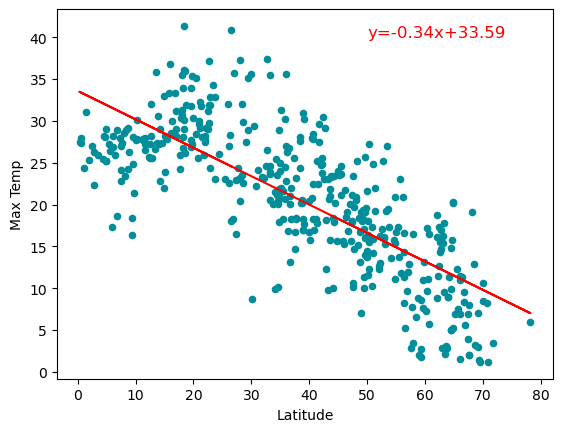

In [49]:
# Linear regression on Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x=northern_hemi_df["Lat"], y=northern_hemi_df["Max Temp"])

regression_line = slope * northern_hemi_df["Lat"] + intercept
regression_line.index = northern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

northern_hemi_df.plot(x="Lat", y="Max Temp", kind="scatter",
                      marker="o", color="#008E9B",
                      xlabel="Latitude", ylabel="Max Temp")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (50, 40), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()


The r-value is: 0.8714520998183225


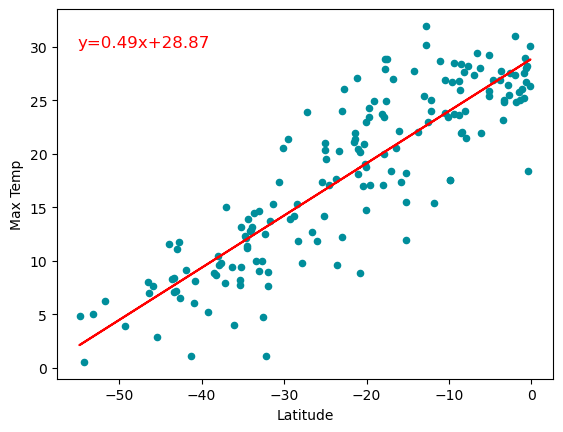

In [51]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x=southern_hemi_df["Lat"], y=southern_hemi_df["Max Temp"])

regression_line = slope * southern_hemi_df["Lat"] + intercept
regression_line.index = southern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

southern_hemi_df.plot(x="Lat", y="Max Temp", kind="scatter",
                      marker="o", color="#008E9B",
                      xlabel="Latitude", ylabel="Max Temp")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (-55, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** According to the plot of temperatures in Northern lat cities, there is a negative correlation which is also indicated by negative r-value. This proves that the locations closer to equator (Lat 0) record higher max temperatures recorded, and locations farther from equator have lower max temperatures recorded.

According to the plot of temperatures in Southern lat cities, there is a positive correlation which is also indicated by positive r-value. This proves that the locations closer to equator (Lat 0) record higher max temperatures recorded, and locations farther from equator have lower max temperatures recorded.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.033859658646852135


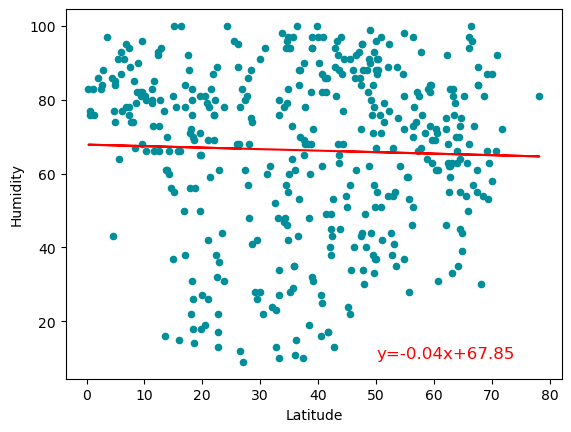

In [53]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x=northern_hemi_df["Lat"], y=northern_hemi_df["Humidity"])

regression_line = slope * northern_hemi_df["Lat"] + intercept
regression_line.index = northern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

northern_hemi_df.plot(x="Lat", y="Humidity", kind="scatter",
                      marker="o", color="#008E9B",
                      xlabel="Latitude", ylabel="Humidity")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (50, 10), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.09402278058791978


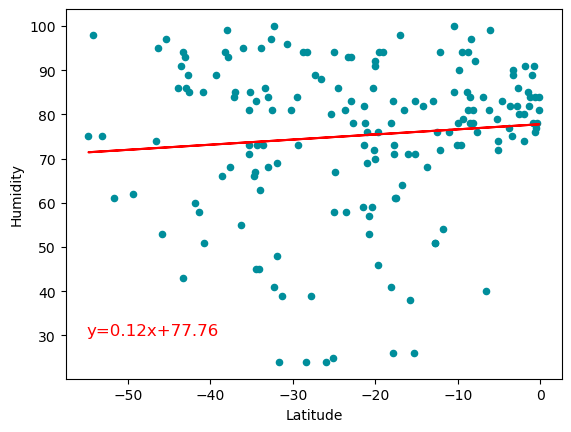

In [55]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x=southern_hemi_df["Lat"], y=southern_hemi_df["Humidity"])

regression_line = slope * southern_hemi_df["Lat"] + intercept
regression_line.index = southern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

southern_hemi_df.plot(x="Lat", y="Humidity", kind="scatter",
                      marker="o", color="#008E9B",
                      xlabel="Latitude", ylabel="Humidity")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (-55, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** There is low correlation evident between Humidity values and Lat position in both Northern and Southern Hemispheres. R-values of both comparisons prove that as well - both r-values are lower than 0.1

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.14515840132740135


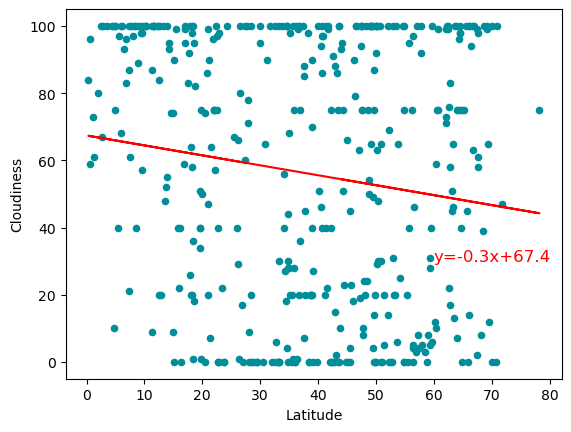

In [59]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x=northern_hemi_df["Lat"], y=northern_hemi_df["Cloudiness"])

regression_line = slope * northern_hemi_df["Lat"] + intercept
regression_line.index = northern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

northern_hemi_df.plot(x="Lat", y="Cloudiness", kind="scatter",
                      marker="o", color="#008E9B",
                      xlabel="Latitude", ylabel="Cloudiness")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (60, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: -0.046621979308938154


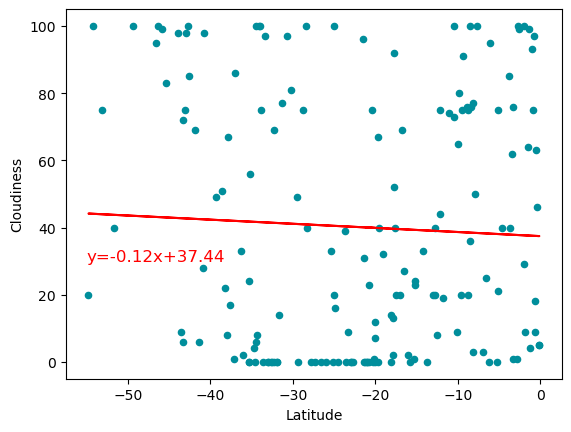

In [60]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x=southern_hemi_df["Lat"], y=southern_hemi_df["Cloudiness"])

regression_line = slope * southern_hemi_df["Lat"] + intercept
regression_line.index = southern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

southern_hemi_df.plot(x="Lat", y="Cloudiness", kind="scatter",
                      marker="o", color="#008E9B",
                      xlabel="Latitude", ylabel="Cloudiness")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (-55, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** There is low correlation evident between Cloudiness values and Lat position in both Northern and Southern Hemispheres. R-values of both comparisons prove that as well - both r-values are lower than 0.15

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0581514168116054


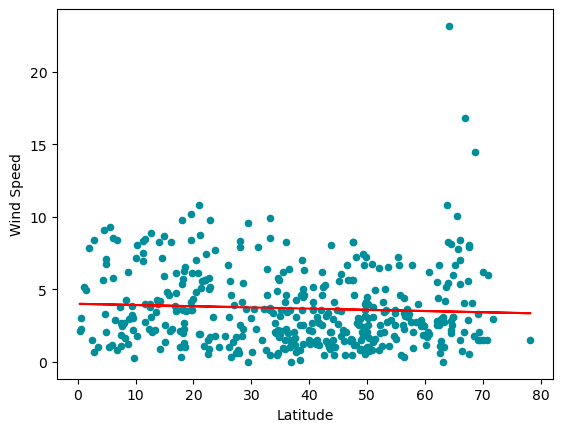

In [61]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x=northern_hemi_df["Lat"], y=northern_hemi_df["Wind Speed"])

regression_line = slope * northern_hemi_df["Lat"] + intercept
regression_line.index = northern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

northern_hemi_df.plot(x="Lat", y="Wind Speed", kind="scatter",
                      marker="o", color="#008E9B",
                      xlabel="Latitude", ylabel="Wind Speed")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (60, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: -0.12282190362980049


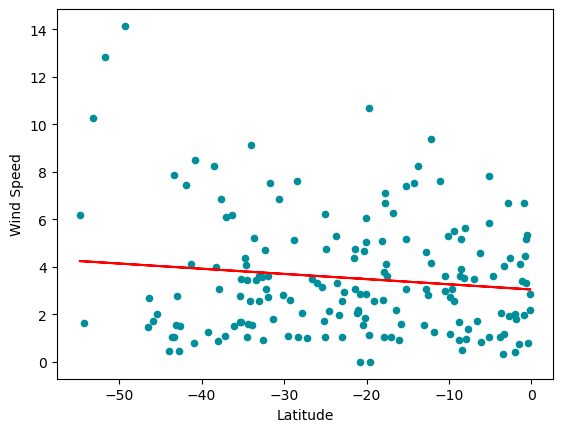

In [62]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x=southern_hemi_df["Lat"], y=southern_hemi_df["Wind Speed"])

regression_line = slope * southern_hemi_df["Lat"] + intercept
regression_line.index = southern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

southern_hemi_df.plot(x="Lat", y="Wind Speed", kind="scatter",
                      marker="o", color="#008E9B",
                      xlabel="Latitude", ylabel="Wind Speed")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (-55, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** There is low correlation evident between Wind Speed values and Lat position in both Northern and Southern Hemispheres. R-values of both comparisons prove that as well - both r-values are lower than 0.15